### <span style="color:red">Lorenzo Albano, 967738</span>

# <span style="color:red"> ESERCIZIO 9.1:</span> Problema del commesso viaggiatore: algoritmo genetico


Il problema del commesso viaggiatore (TSP) consiste in un commesso e un insieme di $N$ (in questa esercitazione $N=34$) città con posizioni $\vec{c}_i$. Il commesso deve visitare ciascuna delle città a partire da una determinata città fissata e ritornare alla stessa città di partenza. La sfida del problema è che il commesso vuole minimizzare la lunghezza totale del viaggio.

Si desidera quindi trovare l'ordine in cui il commesso deve visitare le $N$ città che minimizzi la funzione costo
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$
dove $\vec{x}_{N+1}=\vec{x}_1$

Un possibile percorso è espresso tramite un vettore 1D di $N$ interi, dove ad ogni intero è associata una città. 
Dato che si intende usare un algoritmo genetico per risolvere il problema, si farà riferimento a questo vettore di interi come **CROMOSOMA**.

L'insieme dei cromosomi costituisce la **POPOLAZIONE** (si è scelto $N_{cromosomi}=1000$), che si evolve nel tempo di generazione in **GENERAZIONE** (si è scelto $N_{generazioni}=10000$).

Le $N$ città sono disposte casualmente prima su una circonferenza <span style="color:blue">{GRAFICI A} </span> (al fine di controllare la bontà del programma scritto: il percorso con $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ minore è sicuramente il poligono inscritto nella circonferenza), poi all'interno di un quadrato di lato 1 <span style="color:green"> {GRAFICI B} </span>

Per ciascuno dei due casi vengono quindi realizzati 3 grafici:
- $L^{(1)}$ del percorso migliore in funzione del numero di generazioni
- Media di $L^{(1)}$ sulla metà migliore della popolazione in funzione del numero di generazioni
- Figura del percorso migliore in coordinate cartesiane


Nota: Fissare la città di partenza in modo che appaia sempre al primo posto del cromosoma riduce la degenerazione del percorso più breve a 2 (ovvero percorrerlo in senso orario ed antiorario).

### Ordinamento e Selezione
Si scrive una funzione di sort che ordini la popolazione (ad ogni generazione) secondo la funzione di costo $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Quindi, si implementa un operatore di selezione, che seleziona il j-esimo cromosoma, favorendo nella scelta la parte alta o bassa della popolazione a seconda che l'esponente $p$ sia maggiore o minore di 1:
$$j= int(N_{cromosomi} \times r^p)$$
dove $r$ è un numero estratto casualmente $\in[0,1)$.

Nota: per semplicità d'esposizione, gli esempi qui sotto sono resi con $N=5$

### Operatore di crossover

Questo è il metodo principale che si utilizza per creare nuovi individui (cromosomi), in quanto la probabilità di una sua chiamata viene posta $p^{(i)}_c > 50\%$.
In particolare esso opera come segue:
1. l'operatore di selezione sceglie due cromosomi nella popolazione (una madre ed un padre):
$$\hbox{ad esempio} \hspace{1cm} [1,2,3,4,5]\hspace{0.5cm}\hbox{e} \hspace{0.5cm}[1,5,4,3,2]$$

2. viene selezionata randomicamente una posizione in cui tagliare il percorso dei genitori:
$$\hbox{ad esempio} \hspace{1cm} [1,2,3|4,5]\hspace{0.5cm}\hbox{e} \hspace{0.5cm}[1,5,4|3,2]$$

3. si conserva solo la prima parte dei percorsi:
$$ [1,2,3|𝑋,𝑌]\hspace{0.5cm}\hbox{e} \hspace{0.5cm}[1,5,4|𝑋,𝑌]$$

4. si completano i percorsi con le città mancanti **inserite nell'ordine in cui appaiono nel partner**:
$$[1,2,3|5,4]\hspace{0.5cm}\hbox{e} \hspace{0.5cm}[1,5,4|2,3]$$

5. vengono selezionati due cromosomi "cattivi" (al di fuori del primo quarto di popolazione), che vengono sostituiti da quelli appena creati



### Mutazioni
Ecco le mutazioni genetiche introdotte, che permettono di evolvere la popolazione (probabilità di ciascuna di venir chiamata: $p^{(i)}_m < 10\%$) :

1. **SHUFFLE** = due città di un individuo (cromosoma) sono invertite di posizione
$$\hbox{ad esempio} \hspace{1cm} \left[ 1, 2, \color{red}{3}, \color{blue}{4}, 5, 6 \right] \to \left[ 1, 2, \color{blue}{4}, \color{red}{3}, 5, 6 \right]$$

2. **TRASLA_A_BLOCCHI** = sposta di $+n$ posizioni, $m$ città continue ($m \lt N-1$ per non spostare la prima città)
$$\hbox{ad esempio} \hspace{1cm} \left[ 1, \color{red}{2}, \color{red}{3}, 4, 5, 6\right] \to \left[ 1, 4, 5, \color{red}{2}, \color{red}{3}, 6 \right]$$

3. **SHUFFLE_A_SEGMENTI** = due insiemi di città di ugual dimensione in un cromosoma vengono invertiti di posizione (sempre $m<N/2$). Si consiglia di usarlo quando sono già state create sequenze buone (dopo un tot di generazioni), che con un semplice shuffle andrei a peggiorare.
$$\hbox{ad esempio} \hspace{1cm} \left[ 1, \color{red}{2}, \color{red}{3}, 4, \color{blue}{5}, \color{blue}{6} \right] \to \left[ 1, \color{blue}{5}, \color{blue}{6}, 4, \color{red}{2}, \color{red}{3} \right]$$
4. **INVERSIONE** = ribaltamento dell'ordine in cui appaiono $m$ città del cromosoma ($m \lt N$ per escludere la prima città). Ciò permette di rompere anche l'ultima degerazione (senso orario Vs antiorario del percorso migliore), perché consente ad uno dei due di prevalere
$$\hbox{ad esempio} \hspace{1cm} \left[ 1, 2, \color{red}{3}, \color{red}{4},  \color{red}{5}, 6 \right] \to \left[ 1, 2,  \color{red}{5},  \color{red}{4}, \color{red}{3}, 6 \right]$$

### Metodi di controllo
Si implementano anche due metodi che controllino che le condizioni del problema siano rispettate su ogni cromosoma creato o mutato:
- controllo che la prima città sia sempre la stessa (numero 0 nel vettore 1D)
- controllo che ogni città compaia solo una volta nel cromosoma, tramite somma delle componenti del vettore 1D (che deve fare $\frac{N(N-1)}{2}$) e somma dei quadrati delle componenti (che deve fare $\frac{N(N-1)(2N+1)}{6}$) (perché le città vengono numerate da $0$ a $N-1$)

## <span style="color:blue"> GRAFICI A) </span> Città disposte casualmente su una circonferenza

I seguenti grafici confermano la bontà del programma realizzato, in quanto il percorso migliore trovato con l'algoritmo genetico risulta essere il poligono iscritto nella circonferenza, come predetto. Dai grafici di $L^{(1)}$ del percorso migliore e della media di $L^{(1)}$ sulla metà migliore della popolazione in funzione del numero di generazioni risulta evidente come all'algoritmo bastino solo $\simeq 150$ generazioni per trovare la soluzione al problema di ottimizzazione! (Nei file di output utilizzati, ci si è spinti (inutilmente) fino a 10000 generazioni).

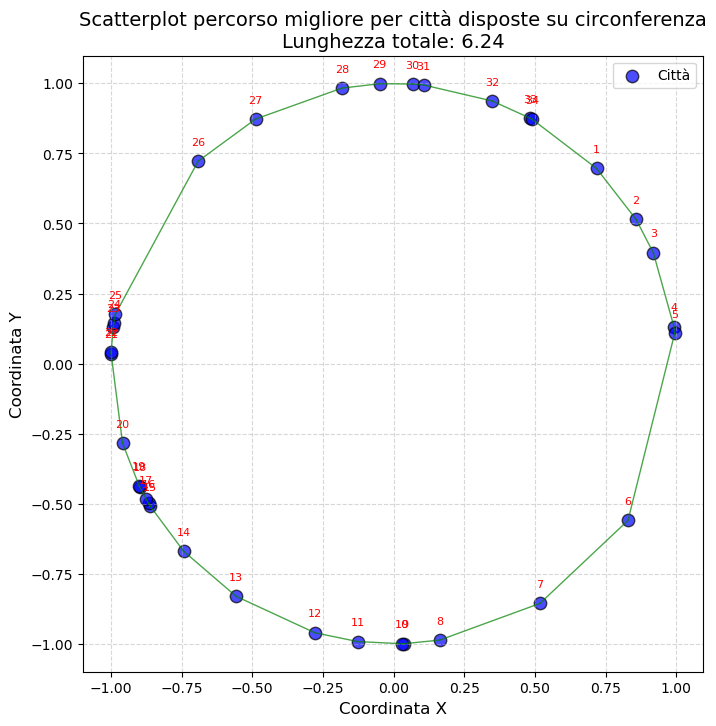

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dal file (2 colonne: x e y delle città, nell'ordine in cui vanno legate)
data = np.loadtxt("1.Circ.coordinate.out")

# Estrai le colonne x e y
x = data[:, 1]
y = data[:, 2]

# Inizializza la lunghezza totale del percorso a zero
total_length = 0.0

# Crea una figura quadrata
plt.figure(figsize=(8, 8))

# Crea lo scatterplot con uno stile migliorato
plt.scatter(x, y, s=80, c='blue', edgecolors='black', alpha=0.7, label='Città')

# Aggiungi numeri ai punti in ordine di come sono stati collegati
for i, (xi, yi) in enumerate(zip(x, y)):
    offset = 0.05
    plt.text(xi, yi+offset, str(i+1), color='red', ha='center', va='bottom', fontsize=8)

# Aggiungi segmenti che uniscono i punti in ordine
for i in range(len(x) - 1):
    distance = np.sqrt((x[i + 1] - x[i])**2 + (y[i + 1] - y[i])**2)
    total_length += distance
    plt.plot([x[i], x[i + 1]], [y[i], y[i + 1]], '-', color='green', linewidth=1, alpha=0.7)

# Traccia il segmento che collega l'ultimo punto al primo punto
distance = np.sqrt((x[-1] - x[0])**2 + (y[-1] - y[0])**2)
total_length += distance
plt.plot([x[-1], x[0]], [y[-1], y[0]], '-', color='green', linewidth=1, alpha=0.7)

# Aggiungi etichette agli assi
plt.xlabel("Coordinata X", fontsize=12)
plt.ylabel("Coordinata Y", fontsize=12)

# Aggiungi un titolo al grafico con la lunghezza totale del percorso
plt.title(f"Scatterplot percorso migliore per città disposte su circonferenza\nLunghezza totale: {total_length:.2f}", fontsize=14)

# Mostra una griglia di sfondo
plt.grid(True, linestyle='--', alpha=0.5)

# Mostra la legenda
plt.legend()

# Mostra il grafico
plt.show()


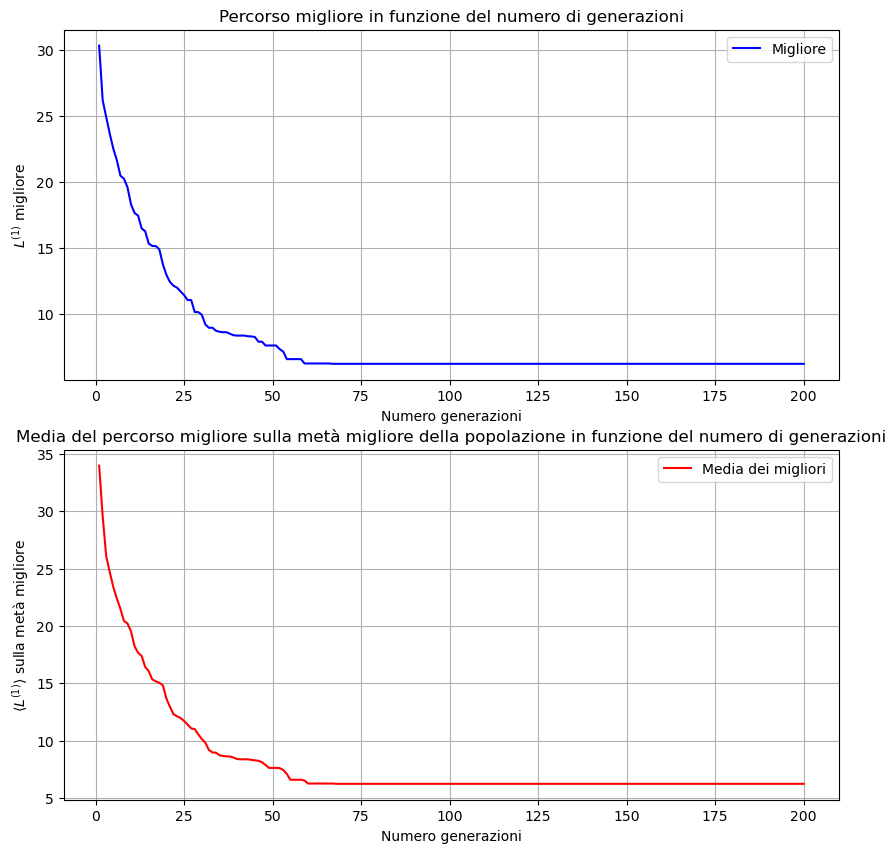

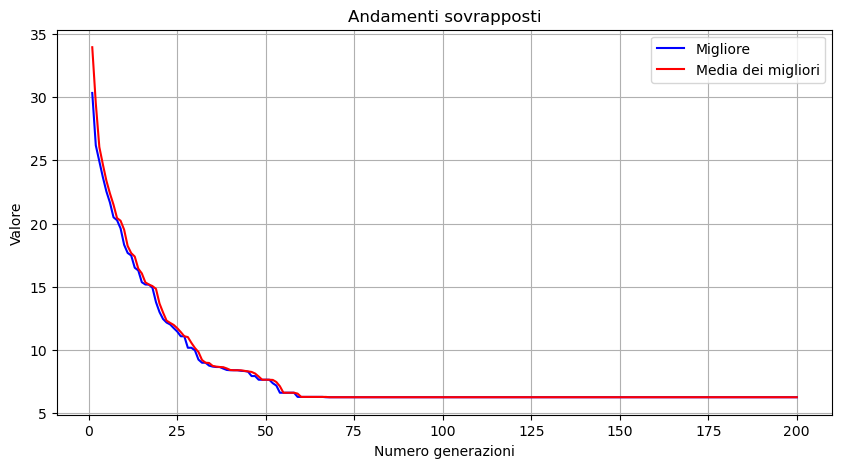

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dal file (supponiamo che il file si chiami "dati.txt")
data = np.loadtxt("1.Circ.lunghezza.out")

# Estrai le colonne
numero_generazioni_totali = 10000
numero_progressivo = np.arange(1, 201)
andamento1 = data[:200, 0]
andamento2 = data[:200, 1]

# Crea il plot dei due andamenti
plt.figure(figsize=(10, 10))

# Andamento 1
plt.subplot(2, 1, 1)
plt.plot(numero_progressivo, andamento1, color='blue', label='Migliore')
plt.xlabel('Numero generazioni')
plt.ylabel(r'$L^{(1)}$ migliore')
plt.title('Percorso migliore in funzione del numero di generazioni')
plt.grid(True)
plt.legend()

# Andamento 2
plt.subplot(2, 1, 2)
plt.plot(numero_progressivo, andamento2, color='red', label='Media dei migliori')
plt.xlabel('Numero generazioni')
plt.ylabel(r'$\langle L^{(1)} \rangle$ sulla metà migliore')
plt.title('Media del percorso migliore sulla metà migliore della popolazione in funzione del numero di generazioni')
plt.grid(True)
plt.legend()

# Terzo grafico sovrapposto
plt.figure(figsize=(10, 5))
plt.plot(numero_progressivo, andamento1, color='blue', label='Migliore')
plt.plot(numero_progressivo, andamento2, color='red', label='Media dei migliori')
plt.xlabel('Numero generazioni')
plt.ylabel('Valore')
plt.title('Andamenti sovrapposti')
plt.grid(True)
plt.legend()

# Mostra il grafico
plt.show()


## <span style="color:green"> GRAFICI B) </span> Città disposte casualmente all'interno di un quadrato

I seguenti grafici confermano la bontà del programma realizzato, in quanto il percorso migliore trovato con l'algoritmo genetico risulta non avere intersezioni. Dai grafici di $L^{(1)}$ del percorso migliore e della media di $L^{(1)}$ sulla metà migliore della popolazione in funzione del numero di generazioni risulta evidente come all'algoritmo bastino solo $\simeq 150$ generazioni per trovare la soluzione al problema di ottimizzazione! (Nei file di output utilizzati, ci si è spinti (inutilmente) fino a 10000 generazioni).

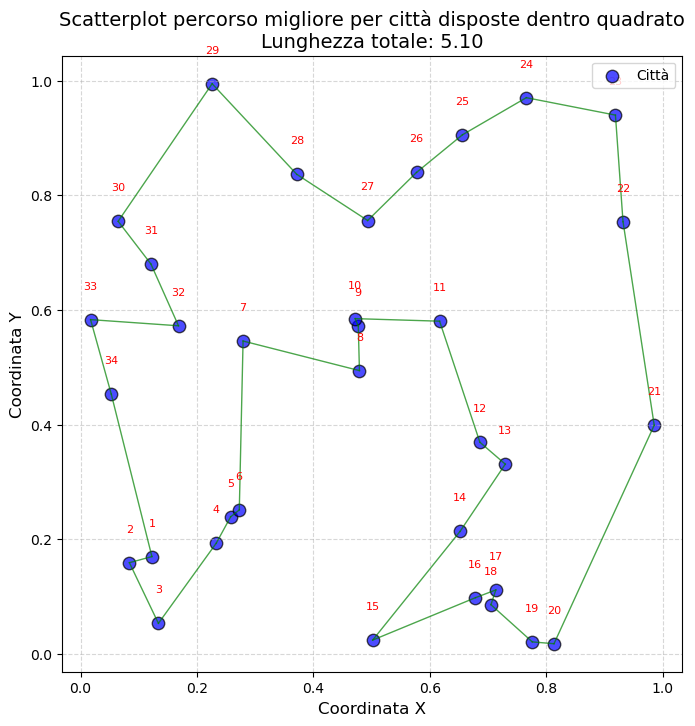

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dal file (2 colonne: x e y delle città, nell'ordine in cui vanno legate)
data = np.loadtxt("1.Quad.coordinate.out")

# Estrai le colonne x e y
x = data[:, 1]
y = data[:, 2]

# Inizializza la lunghezza totale del percorso a zero
total_length = 0.0

# Crea una figura quadrata
plt.figure(figsize=(8, 8))

# Crea lo scatterplot con uno stile migliorato
plt.scatter(x, y, s=80, c='blue', edgecolors='black', alpha=0.7, label='Città')

# Aggiungi numeri ai punti in ordine di come sono stati collegati
for i, (xi, yi) in enumerate(zip(x, y)):
    offset = 0.05
    plt.text(xi, yi+offset, str(i+1), color='red', ha='center', va='bottom', fontsize=8)

# Aggiungi segmenti che uniscono i punti in ordine
for i in range(len(x) - 1):
    distance = np.sqrt((x[i + 1] - x[i])**2 + (y[i + 1] - y[i])**2)
    total_length += distance
    plt.plot([x[i], x[i + 1]], [y[i], y[i + 1]], '-', color='green', linewidth=1, alpha=0.7)

# Traccia il segmento che collega l'ultimo punto al primo punto
distance = np.sqrt((x[-1] - x[0])**2 + (y[-1] - y[0])**2)
total_length += distance
plt.plot([x[-1], x[0]], [y[-1], y[0]], '-', color='green', linewidth=1, alpha=0.7)

# Aggiungi etichette agli assi
plt.xlabel("Coordinata X", fontsize=12)
plt.ylabel("Coordinata Y", fontsize=12)

# Aggiungi un titolo al grafico con la lunghezza totale del percorso
plt.title(f"Scatterplot percorso migliore per città disposte dentro quadrato\nLunghezza totale: {total_length:.2f}", fontsize=14)

# Mostra una griglia di sfondo
plt.grid(True, linestyle='--', alpha=0.5)

# Mostra la legenda
plt.legend()

# Mostra il grafico
plt.show()

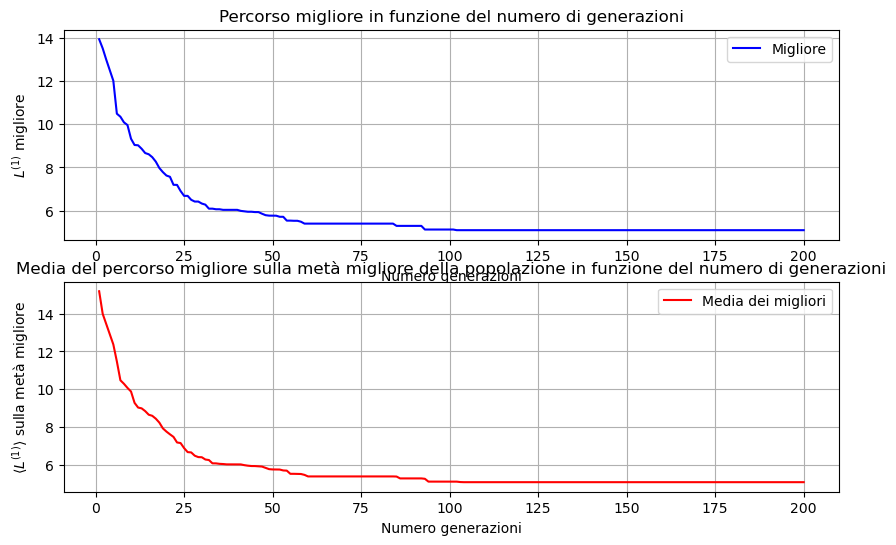

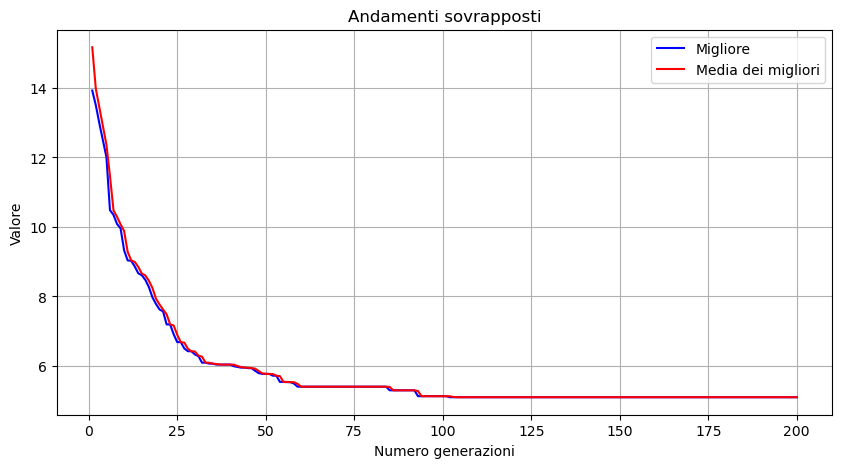

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dal file (supponiamo che il file si chiami "dati.txt")
data = np.loadtxt("1.Quad.lunghezza.out")

# Estrai le colonne
numero_generazioni_totali = 10000  # Numero totale di generazioni nel tuo file
numero_progressivo = np.arange(1, 201)  # Prendi solo i primi 2000 punti
andamento1 = data[:200, 0]  # Prendi solo i primi 2000 punti da andamento1
andamento2 = data[:200, 1]  # Prendi solo i primi 2000 punti da andamento2

# Crea il plot dei due andamenti
plt.figure(figsize=(10, 6))  # Imposta le dimensioni della figura

# Andamento 1
plt.subplot(2, 1, 1)  # Crea il primo sottoplot
plt.plot(numero_progressivo, andamento1, color='blue', label='Migliore')
plt.xlabel('Numero generazioni')
plt.ylabel(r'$L^{(1)}$ migliore')
plt.title('Percorso migliore in funzione del numero di generazioni')
plt.grid(True)
plt.legend()

# Andamento 2
plt.subplot(2, 1, 2)  # Crea il secondo sottoplot
plt.plot(numero_progressivo, andamento2, color='red', label='Media dei migliori')
plt.xlabel('Numero generazioni')
plt.ylabel(r'$\langle L^{(1)} \rangle$ sulla metà migliore')
plt.title('Media del percorso migliore sulla metà migliore della popolazione in funzione del numero di generazioni')
plt.grid(True)
plt.legend()

# Terzo grafico sovrapposto
plt.figure(figsize=(10, 5))
plt.plot(numero_progressivo, andamento1, color='blue', label='Migliore')
plt.plot(numero_progressivo, andamento2, color='red', label='Media dei migliori')
plt.xlabel('Numero generazioni')
plt.ylabel('Valore')
plt.title('Andamenti sovrapposti')
plt.grid(True)
plt.legend()

# Mostra il grafico
plt.show()
